## Step 1: Importing Data with Pandas

The first step is to import the FIFA dataset from a CSV file using the Pandas library. The dataset contains many types of data, but the goal is to focus only on the relevant ones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('csv/fifa_eda_stats.csv')
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


## Step 2: Hypothesis One: Younger players (under 25) are more valuable on the transfer market than older players.

Determining whether the hypothesis is confirmed or rejected is very difficult, even when using the null hypothesis.

$H_0$: There is no difference between the value of younger players and older ones.

The very first step is to convert the data into the appropriate format. First, I extracted the age and value from every row, then processed strings like `€123.45M` or `€67.8K` into `123450000` and `67800`, respectively. I also divided the data into two sets: one containing players older than 25 years, and the other with younger players.

In [3]:
hypo_age = data[[
    'Age',
    'Value'
]].copy()

hypo_age['Age'] = hypo_age['Age'].astype(int)
hypo_age['Value'] = hypo_age['Value'].str.replace('€', '', regex=False)
hypo_age = hypo_age.dropna()
hypo_age['Value'] = hypo_age['Value'].apply(
    lambda value: float(value[:-1]) * 1000000 if value[-1] == 'M' else float(value[:-1]) * 1000 if value[-1] == 'K' else 0
)
hypo_age = hypo_age[ hypo_age['Value'] != 0 ]

hypo_age

,Age,Value
0,31,110500000.0
1,33,77000000.0
2,26,118500000.0
3,27,72000000.0
4,27,102000000.0
...,...,...
18202,19,60000.0
18203,19,60000.0
18204,16,60000.0
18205,17,60000.0


In [4]:
hypo_age_under_25 = hypo_age[hypo_age['Age'] < 25]
hypo_age_under_25 = hypo_age_under_25['Value'].tolist()

hypo_age_under_25 = [ float(value) for value in hypo_age_under_25 ]

In [5]:
hypo_age_over_25 = hypo_age[hypo_age['Age'] >= 25]
hypo_age_over_25 = hypo_age_over_25['Value'].tolist()

hypo_age_over_25 = [ float(value) for value in hypo_age_over_25 ]

In [6]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

import src.descriptive_statistics as ds
import src.hypothesis_testing as ht
import src.distributions as dist
import src.generator as gen

In my experiment, I used the z-test because it is suitable for very large datasets containing more than 30 elements.

If $p < 0.05$, then I can reject the null hypothesis $H_0$, meaning that these two sets come from different distributions. Otherwise, there is no reason to reject $H_0$.

In [7]:
print(ht.independent_samples_z_test(
    sample_one = hypo_age_under_25,
    sample_two = hypo_age_over_25
))

{'z-statictics': -13.962410240789595, 'p-value': -8.881784197001252e-16, 'degrees_of_freedom': 17953}


The p-value is less than 0.05, so the null hypothesis is rejected. This means there is a significant difference between players under 25 and those over 25.

I decided to examine the differences using descriptive statistical measures.

In [8]:
under_25_mean = ds.mean(hypo_age_under_25)
under_25_median = ds.median(hypo_age_under_25)
under_25_std = ds.standard_deviation(hypo_age_under_25)

over_25_mean = ds.mean(hypo_age_over_25)
over_25_median = ds.median(hypo_age_over_25)
over_25_std = ds.standard_deviation(hypo_age_over_25)

Value mean < 25: 1849272.6540938362 versus >= 25: 3003592.7205961766
Value median < 25: 550000.0 versus >= 25: 850000.0
Value std < 25: 4490463.571286637 versus >= 25: 6466415.207308098


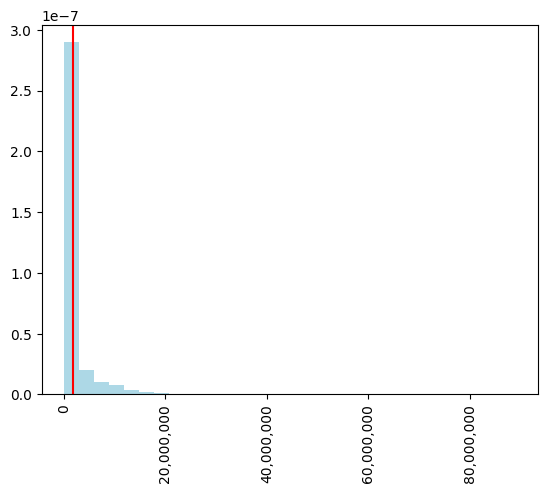

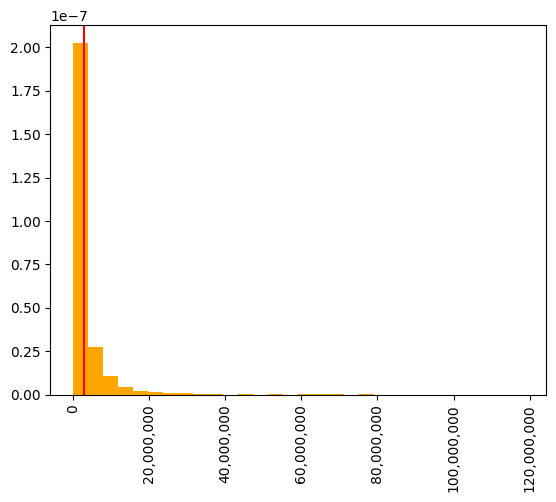

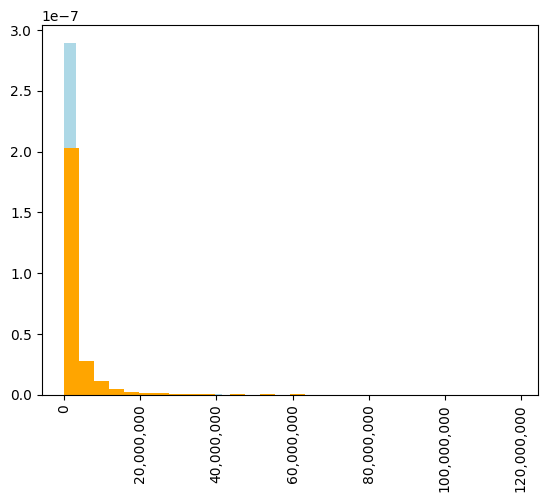

In [9]:
print('Value mean < 25:', under_25_mean, 'versus >= 25:', over_25_mean)
print('Value median < 25:', under_25_median, 'versus >= 25:', over_25_median)
print('Value std < 25:', under_25_std, 'versus >= 25:', over_25_std)

plt.hist(hypo_age_under_25, density=True, bins=30, color='lightblue')
plt.axvline(under_25_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_age_over_25, density=True, bins=30, color='orange')
plt.axvline(over_25_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_age_under_25, density=True, bins=30, color='lightblue')
plt.hist(hypo_age_over_25, density=True, bins=30, color='orange')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

Because the measurement results are greater for the older players, I have found evidence that the main hypothesis is false, as older players are more valuable.


### Step 3: Brazilian players have a higher average skill rating (measured by dribbling and ball control) than German players.

As in the second step, I divided the dataset into two parts: one containing information about Brazilian players and the other about German players. I also added an additional column representing the mean of the `Dribbling` and `BallControl` columns.

$H_0$: There is no difference in the average skill rating between Brazilian and German players.

In [10]:
hypo_nationality = data[[
    'Nationality',
    'Dribbling',
    'BallControl'
]].copy()

hypo_nationality['Dribbling'] = hypo_nationality['Dribbling'].astype(float)
hypo_nationality['BallControl'] = hypo_nationality['BallControl'].astype(float)
hypo_nationality['AverageSkills'] = ( hypo_nationality['Dribbling'] + hypo_nationality['BallControl'] ) / 2

hypo_nationality

,Nationality,Dribbling,BallControl,AverageSkills
0,Argentina,97.0,96.0,96.5
1,Portugal,88.0,94.0,91.0
2,Brazil,96.0,95.0,95.5
3,Spain,18.0,42.0,30.0
4,Belgium,86.0,91.0,88.5
...,...,...,...,...
18202,England,42.0,43.0,42.5
18203,Sweden,39.0,40.0,39.5
18204,England,45.0,44.0,44.5
18205,England,51.0,52.0,51.5


In [11]:
hypo_nationality_brazil = hypo_nationality[ hypo_nationality['Nationality'] == 'Brazil' ]
hypo_nationality_brazil = hypo_nationality_brazil.dropna()
hypo_nationality_brazil = hypo_nationality_brazil['AverageSkills'].tolist()
hypo_nationality_brazil = [ float(value) for value in list(hypo_nationality_brazil) ]

In [12]:
hypo_nationality_germany = hypo_nationality[ hypo_nationality['Nationality'] == 'Germany' ]
hypo_nationality_germany = hypo_nationality_germany.dropna()
hypo_nationality_germany = hypo_nationality_germany['AverageSkills'].tolist()
hypo_nationality_germany = [ float(value) for value in list(hypo_nationality_germany) ]

In [13]:
print(ht.independent_samples_z_test(
    sample_one = hypo_nationality_brazil,
    sample_two = hypo_nationality_germany
))

{'z-statictics': 9.269172682043527, 'p-value': -8.881784197001252e-16, 'degrees_of_freedom': 2018}


The p-value is less than 0.05, so I can confidently reject the null hypothesis $H_0$ and proceed to check which country employs better players.

In [14]:
brazil_mean = ds.mean(hypo_nationality_brazil)
brazil_median = ds.median(hypo_nationality_brazil)
brazil_std = ds.standard_deviation(hypo_nationality_brazil)

germany_mean = ds.mean(hypo_nationality_germany)
germany_median = ds.median(hypo_nationality_germany)
germany_std = ds.standard_deviation(hypo_nationality_germany)

AverageSkills mean Brazil: 62.346060606060604 versus Germany: 54.92133891213389
AverageSkills median Brazil: 68.0 versus Germany: 60.5
AverageSkills standard deviation Brazil: 17.203026295100376 versus Germany: 18.386578061514815


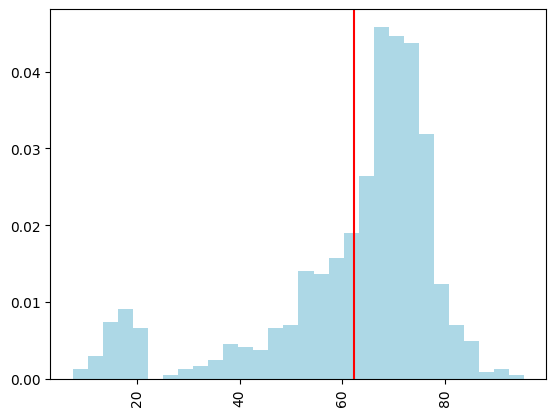

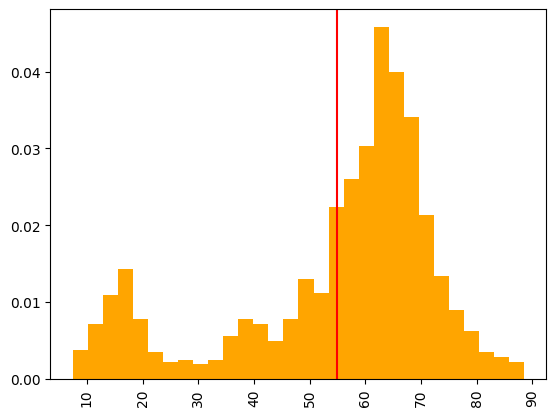

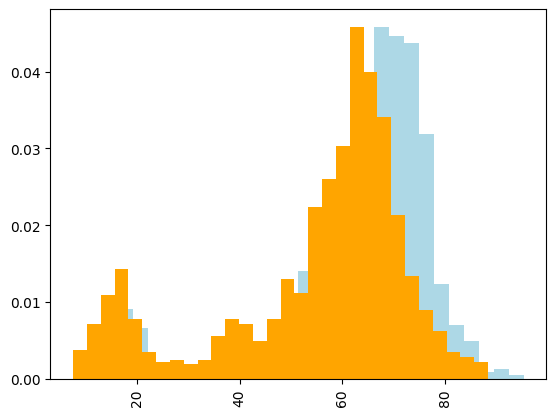

In [15]:
print('AverageSkills mean Brazil:', brazil_mean, 'versus Germany:', germany_mean)
print('AverageSkills median Brazil:', brazil_median, 'versus Germany:', germany_median)
print('AverageSkills standard deviation Brazil:', brazil_std, 'versus Germany:', germany_std)

plt.hist(hypo_nationality_brazil, density=True, bins=30, color='lightblue')
plt.axvline(brazil_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_nationality_germany, density=True, bins=30, color='orange')
plt.axvline(germany_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_nationality_brazil, density=True, bins=30, color='lightblue')
plt.hist(hypo_nationality_germany, density=True, bins=30, color='orange')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

Using common measurements, the answer is quite clear: Brazilian players have a better average skill rating than German players. Therefore, I can confirm the main hypothesis.

### Step 4: Attacking players (for example: strikers and attacking midfielders) have significantly better passing skills than defenders.

I divided the dataset of players into two groups based on their positions: offensive and defensive. The offensive positions include `["ST" (Striker), "CF" (Center Forward), "LW" (Left Winger), "RW" (Right Winger), "CAM" (Central Attacking Midfielder), "LF" (Left Forward), "RF" (Right Forward), "LM" (Left Midfielder), "RM" (Right Midfielder)]`, while the defensive positions are `["CB" (Center Back), "LB" (Left Back), "RB" (Right Back), "LWB" (Left Wing Back), "RWB" (Right Wing Back), "CDM" (Central Defensive Midfielder)]`.


In [16]:
offensive_positions = ["ST", "CF", "LW", "RW", "CAM", "LF", "RF", "LM", "RM"]
defensive_positions = ["CB", "LB", "RB", "LWB", "RWB", "CDM"]

In [17]:
hypo_att_def = data[[
    'Position',
    'ShortPassing',
    'LongPassing'
]].copy()

hypo_att_def['ShortPassing'] = hypo_att_def['ShortPassing'].astype(float)
hypo_att_def['LongPassing'] = hypo_att_def['LongPassing'].astype(float)

hypo_att_def['AveragePassing'] = ( hypo_att_def['LongPassing'] + hypo_att_def['ShortPassing'] ) / 2

hypo_att_def

,Position,ShortPassing,LongPassing,AveragePassing
0,RF,90.0,87.0,88.5
1,ST,81.0,77.0,79.0
2,LW,84.0,78.0,81.0
3,GK,50.0,51.0,50.5
4,RCM,92.0,91.0,91.5
...,...,...,...,...
18202,CM,49.0,45.0,47.0
18203,ST,43.0,25.0,34.0
18204,ST,38.0,28.0,33.0
18205,RW,42.0,32.0,37.0


In [18]:
hypo_att_def_offensive = hypo_att_def[ hypo_att_def['Position'].isin(offensive_positions) ]
hypo_att_def_offensive = hypo_att_def_offensive.dropna()
hypo_att_def_offensive = hypo_att_def_offensive['AveragePassing'].tolist()
hypo_att_def_offensive = [ float(value) for value in hypo_att_def_offensive ]

In [19]:
hypo_att_def_defensive = hypo_att_def[ hypo_att_def['Position'].isin(defensive_positions) ]
hypo_att_def_defensive = hypo_att_def_defensive.dropna()
hypo_att_def_defensive = hypo_att_def_defensive['AveragePassing'].tolist()
hypo_att_def_defensive = [ float(value) for value in hypo_att_def_defensive ]

In [20]:
ht.independent_samples_z_test(
    sample_one = hypo_att_def_offensive,
    sample_two = hypo_att_def_defensive
)

{'z-statictics': 1.0889001328552346,
 'p-value': 0.276197420638137,
 'degrees_of_freedom': 11687}

The p-value was greater than 0.05, which means there is no basis to reject the null hypothesis that there is no difference in the average passing ability between offensive and defensive players.

In [21]:
offensive_mean = ds.mean(hypo_att_def_offensive)
offensive_median = ds.median(hypo_att_def_offensive)
offensive_std = ds.standard_deviation(hypo_att_def_offensive)

defensive_mean = ds.mean(hypo_att_def_defensive)
defensive_median = ds.median(hypo_att_def_defensive)
defensive_std = ds.standard_deviation(hypo_att_def_defensive)

AveragePassing mean offensive: 57.90994341147938 versus defensive: 57.694404069767444
AveragePassing median offensive: 58.5 versus defensive: 59.5
AveragePassing standard deviation offensive: 10.188094687602277 versus defensive: 11.103346217602104


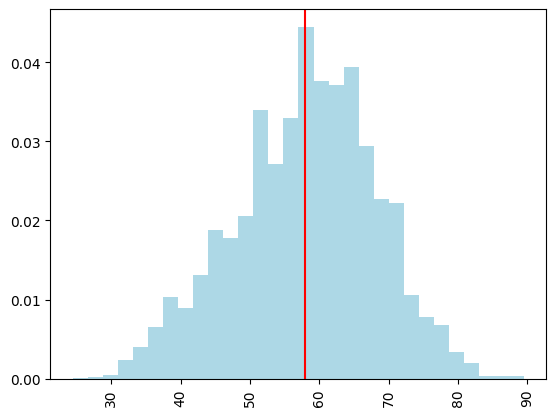

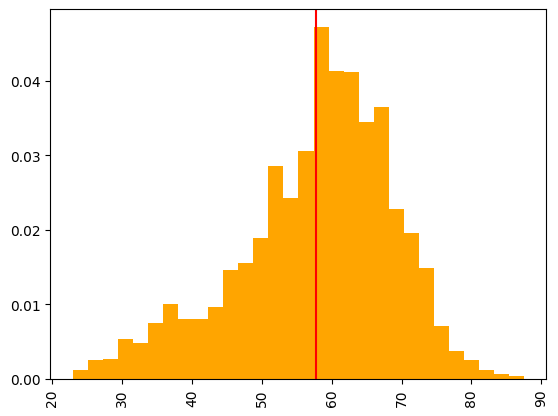

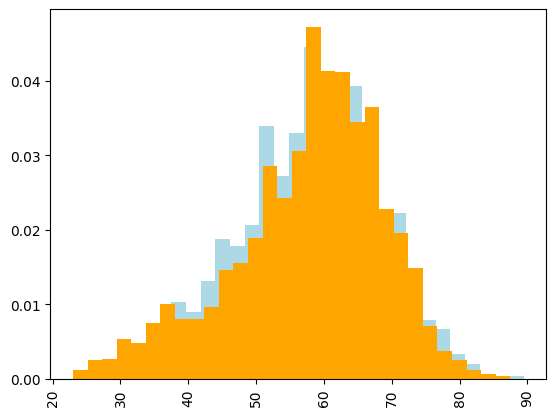

In [22]:
print('AveragePassing mean offensive:', offensive_mean, 'versus defensive:', defensive_mean)
print('AveragePassing median offensive:', offensive_median, 'versus defensive:', defensive_median)
print('AveragePassing standard deviation offensive:', offensive_std, 'versus defensive:', defensive_std)

plt.hist(hypo_att_def_offensive, density=True, bins=30, color='lightblue')
plt.axvline(offensive_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_att_def_defensive, density=True, bins=30, color='orange')
plt.axvline(defensive_mean, color='red')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

plt.hist(hypo_att_def_offensive, density=True, bins=30, color='lightblue')
plt.hist(hypo_att_def_defensive, density=True, bins=30, color='orange')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

The statistical measurements show almost identical results for both groups. This similarity is further confirmed by the histograms, which indicate that the data distributions for offensive and defensive players are very similar.

**In summary**, across all the analyses in this experiment, we found significant differences in some cases—such as between younger and older players and between Brazilian and German players—while in others, like the comparison between offensive and defensive groups, no significant differences were detected. This comprehensive approach highlights how player value and skill metrics can vary depending on the context and criteria examined.